In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import minimize
import os
import investpy
import seaborn as sns

In [147]:
stocknam=['GE','MSFT', 'CAT','DIS','PFE','SBUX','AMD','T','AAPL','GS','PG','XOM']

stock=investpy.get_stock_historical_data(stock=stocknam[0],country='united states', from_date='01/01/2015', to_date='01/01/2020')['Close']
stock=pd.DataFrame(stock)
for s in range(1,len(stocknam)):
    try:
        st=investpy.get_stock_historical_data(stock=stocknam[s],country='united states', from_date='01/01/2015', to_date='01/01/2020')['Close']
        stock=pd.concat([stock,pd.Series(st)],axis=1)
    except RuntimeError:
        print(stocknam[s])

sp=investpy.indices.get_index_historical_data(index='S&P 500',country='united states', from_date='01/01/2015', to_date='01/01/2020')['Close']
stock=pd.concat([stock,sp],axis=1)
stock.columns=stocknam+['S&P 500']

stock.to_excel('data_stocks.xlsx')

In [451]:
stock#stocks we sample from

,GE,MSFT,CAT,DIS,PFE,SBUX,AMD,T,AAPL,GS,PG,XOM,S&P 500
Date,,,,,,,,,,,,,
2015-01-02,25.06,46.76,91.88,93.75,31.33,40.72,2.69,33.87,109.33,194.41,90.44,92.83,2058.20
2015-01-05,24.60,46.33,87.03,92.38,31.16,39.94,2.66,33.55,106.25,188.34,90.01,90.29,2020.58
2015-01-06,24.07,45.65,86.47,91.89,31.42,39.62,2.63,33.60,106.26,184.53,89.60,89.81,2002.61
2015-01-07,24.08,46.23,87.81,92.83,31.85,40.59,2.58,33.17,107.75,187.28,90.07,90.72,2025.90
2015-01-08,24.37,47.59,88.71,93.79,32.50,41.24,2.61,33.50,111.89,190.27,91.10,92.23,2062.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-24,11.19,157.38,147.48,145.29,39.29,88.52,46.54,38.96,284.27,229.91,125.22,70.02,3223.38
2019-12-26,11.23,158.67,148.22,145.70,39.38,88.08,46.63,39.16,289.91,231.21,125.22,70.13,3239.91
2019-12-27,11.18,158.96,148.28,145.75,39.32,88.13,46.18,39.24,289.80,230.66,126.09,69.89,3240.02


In [437]:
#for 2 stocks:

# Parameters
# n - # of stocks to consider
# rf - risk free
# num_ports - # of portfolios to consturct 
n = 2
rf = 1.79/100 
num_ports = 5000

In [453]:
#stocks we currently work with
data=stock.iloc[:,1:3]
data.head(3)

,MSFT,CAT
Date,,
2015-01-02,46.76,91.88
2015-01-05,46.33,87.03
2015-01-06,45.65,86.47


In [454]:
log_ret = np.log(data/data.shift(1)).iloc[1:,:] # calculate percentage daily returns
market_ret = np.log(stock['S&P 500']/stock['S&P 500'].shift(1))#market return
log_ret.head(3)

,MSFT,CAT
Date,,
2015-01-05,-0.009238,-0.054230
2015-01-06,-0.014786,-0.006455
2015-01-07,0.012625,0.015378


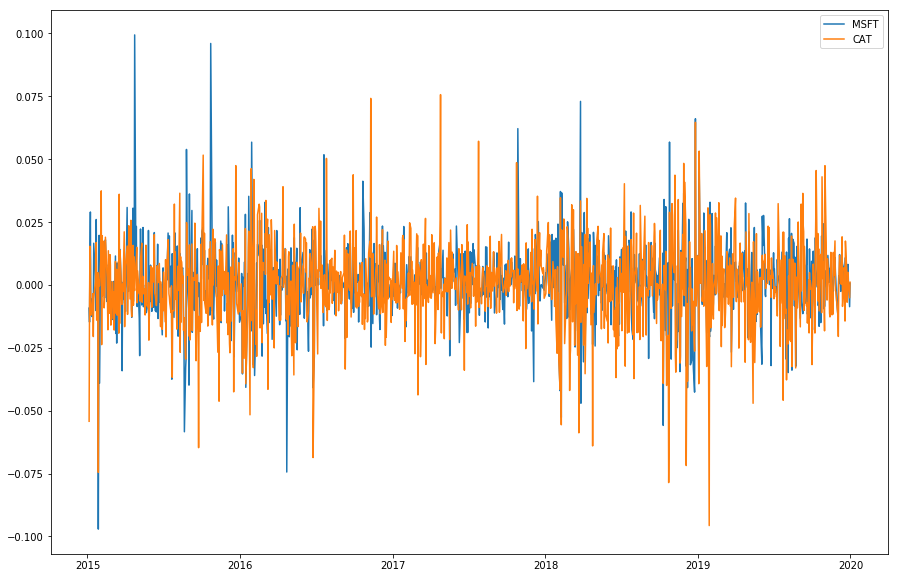

In [455]:
#plot daily returns
plt.figure(figsize = (15, 10))
for i in range(np.array(log_ret).shape[1]):
    plt.plot(log_ret.iloc[:,i],label=list(log_ret.columns)[i])
plt.legend();

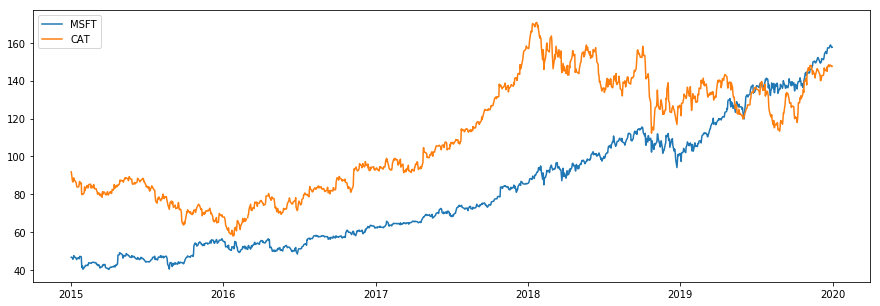

In [456]:
#plot time series data
plt.figure(figsize = (15,5))
for i in range(np.array(data).shape[1]):
    plt.plot(data.iloc[:,i],label=list(data.columns)[i])
plt.legend();

In [457]:
#calculate expected returns and variance
expectedreturns=[]
variance_=[]
for i in range(np.array(log_ret).shape[1]):
    expectedreturns.append(log_ret.iloc[:,i].mean())
    variance_.append(log_ret.iloc[:,i].var())

exp_var=pd.DataFrame([expectedreturns,variance_])
u=['exp','var']
exp_var=pd.concat([exp_var,pd.Series(u)],axis=1)
exp_var.set_index(exp_var.iloc[:,-1], inplace = True, append = True, drop = True)
exp_var.columns=list(log_ret.columns)+['to_del']
exp_var=exp_var.drop(columns=['to_del'])
exp_var

,,MSFT,CAT
,0,,
0,exp,0.000966,0.000368
1,var,0.000215,0.000287


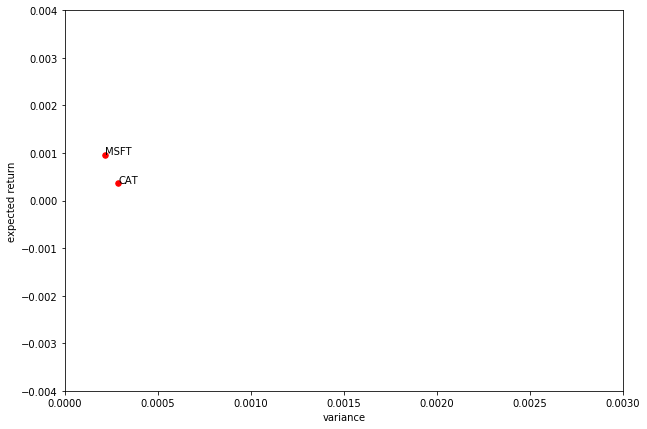

In [458]:
#plot expected returns and variance
plt.figure(figsize=(10,7))
plt.scatter(exp_var.iloc[1,:],exp_var.iloc[0,:],30,c='red')
plt.ylabel('expected return')
plt.xlabel('variance')
plt.xlim(left=0,right=0.003)
plt.ylim(bottom=-0.004,top=0.004)
for i, txt in enumerate(exp_var.columns):
    plt.annotate(txt, (exp_var.iloc[1,i],exp_var.iloc[0,i]))
plt.show()

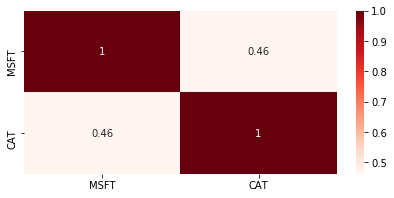

In [459]:
#correlation matrix
plt.figure(figsize=(7,3))
cor = log_ret.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [460]:
#generate potfolios with arbitrary weights
all_weights = np.zeros((num_ports, n))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(n))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]

In [461]:
#get return at minimum variance portfolio
min_var_inx=vol_arr.argmin()
min_var_port_ret=ret_arr[min_var_inx]
max_ret_port=ret_arr[ret_arr.argmax()]


In [462]:
#CML equation: expected return =0.0179 + 0.3071865098913234*portfolio st deviation
x_cml = np.linspace(0, max(vol_arr))
slope = (max_sr_ret - rf) / (max_sr_vol)
y_cml = list(map(lambda x: rf + slope * x, x_cml))
print('CML equation: expected return = {} + {}*portfolio st deviation'.format(rf,slope))

CML equation: expected return = 0.0179 + 0.9690213585150914*portfolio st deviation


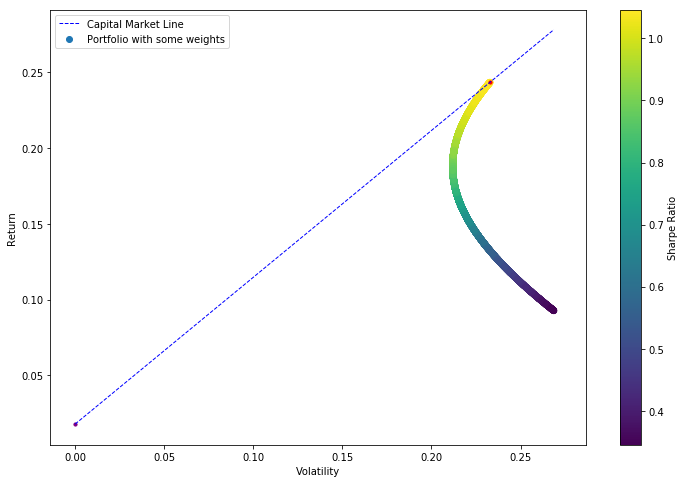

In [463]:
#distribution of portfolio returns
x=[0 ,max_sr_vol]
y=[1.79/100, max_sr_ret  ]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label = 'Portfolio with some weights')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=10) # red dot
plt.scatter(0, 1.79/100,c='purple', s=10) # red dot
plt.plot(x_cml, y_cml, linestyle='--', color='b', linewidth=1, label = 'Capital Market Line')
plt.legend()
plt.plot()
plt.show()

In [464]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [468]:
#optimize Sharpe ratio
frontier_y = np.linspace(min_var_port_ret,0.4 , 200) #max_ret_port
cons = ({'type':'eq', 'fun': check_sum })
bounds = ((0,1),)*n
init_guess = list(map(lambda x: 1/n, range(n)))
opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints=cons)
print(opt_results)

     fun: -1.0459392488266948
     jac: array([0.       , 0.1602588])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1., 0.])


In [469]:
frontier_x = []
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])


KeyboardInterrupt: 

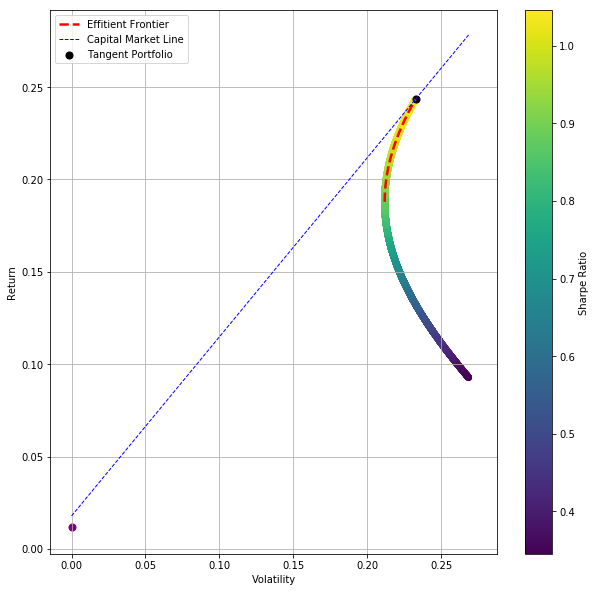

In [467]:
#plot efficient frontier and CML
plt.figure(figsize=(10,10))
plt.grid(linestyle = '-')
#plt.ylim([0,0.135])
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=2.5, label = 'Effitient Frontier')
#plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label = 'Portfolio with some weights')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=50, label = 'Tangent Portfolio') # red dot
plt.scatter(0, 1.19/100,c='purple', s=50) # red dot
plt.plot(x_cml, y_cml, linestyle='--', color='b', linewidth=1, label = 'Capital Market Line')
plt.legend()
plt.show()

In [352]:
#returns of stocks and market
total_return=pd.concat([log_ret,pd.Series(market_ret)],axis=1).iloc[1:,:]
total_return.head(3)

,PG,XOM,S&P 500
Date,,,
2015-01-05,-0.004766,-0.027743,-0.018447
2015-01-06,-0.004565,-0.005330,-0.008933
2015-01-07,0.005232,0.010082,0.011563


In [353]:
covarian=list()
beta=list()
MRP=list()
for i in list(data.columns):
    covarian.append(total_return.cov().loc['S&P 500',i]) #covariance with market portfolio
marketvar=total_return['S&P 500'].var() #variance of market portfoilio
for j in covarian:
    beta.append(j/marketvar)
for u in list(total_return.columns):
    MRP.append(total_return[u].mean()-rf)

In [354]:
nul=['beta','MRP']
d=pd.DataFrame(np.transpose(np.array(beta)))
d=pd.concat([d,pd.Series(MRP)],axis=1)
d=pd.DataFrame(np.transpose(np.array(d)))
d=pd.concat([pd.Series(nul),d],axis=1)
d.columns=['_']+list(total_return.columns)
d=d.set_index(d['_'])
d=d.drop(columns=['_'])
d.loc['beta','S&P 500']=1
d

,PG,XOM,S&P 500
_,,,
beta,0.568075,0.918042,1.000000
MRP,-0.017635,-0.018112,-0.017535


In [355]:
#market mean return
market_ret.mean()

0.0003654823850701116

In [356]:
#CAMP returns
camp=list()
for i in list(d.columns)[:-1]:
    camp.append(rf+d.loc['beta',i]*d.loc['MRP',i])
camp=pd.DataFrame(camp)
camp=pd.DataFrame(np.transpose(np.array(camp)))
camp.columns= list(d.columns)[:-1]
camp

,PG,XOM
0,0.007882,0.001273


In [357]:
#market risk premium
MRP500=total_return['S&P 500'].mean()-rf
MRP500

-0.017534517614929888

In [358]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats

total_return=total_return.dropna()
for k in list(total_return.columns[:-1]):
    y=np.array(total_return[k]).reshape(len(total_return[k]),)-rf
    x=np.array(total_return['S&P 500']).reshape(len(total_return['S&P 500']),1)-rf
    regr = LinearRegression()  
    regr.fit(x,y)
    prediction=regr.predict(x)
    R2=r2_score(y, prediction)
    F=R2/((1-R2)/(x.shape[0]-2))
    critical=scipy.stats.f.ppf(q=0.95, dfn=1, dfd=x.shape[0]-2)
    print('Regression for {} : intercept = {}, slope = {}, F-statistics = {} VS critical F-value = {}'.format(k,regr.intercept_,regr.coef_[0],F,critical))

Regression for PG : intercept = -0.007674061813481596, slope = 0.5680748554911014, F-statistics = 383.3792486859665 VS critical F-value = 3.8488850232310883
Regression for XOM : intercept = -0.002014088785548665, slope = 0.9180418599329604, F-statistics = 886.1802790216583 VS critical F-value = 3.8488850232310883


In [399]:
#For many stocks:

# Parameters
# n - # of stocks to consider
# rf - risk free
# num_ports - # of portfolios to consturct 
n = 6
rf = 1.79/100 
num_ports = 10000

In [400]:
#stocks we currently work with
data=stock.iloc[:,-9:-3]
data.head(3)

,PFE,SBUX,AMD,T,AAPL,GS
Date,,,,,,
2015-01-02,31.33,40.72,2.69,33.87,109.33,194.41
2015-01-05,31.16,39.94,2.66,33.55,106.25,188.34
2015-01-06,31.42,39.62,2.63,33.60,106.26,184.53


In [401]:
log_ret = np.log(data/data.shift(1)).iloc[1:,:] # calculate percentage daily returns
market_ret = np.log(stock['S&P 500']/stock['S&P 500'].shift(1))#market return
log_ret.head(3)

,PFE,SBUX,AMD,T,AAPL,GS
Date,,,,,,
2015-01-05,-0.005441,-0.019341,-0.011215,-0.009493,-0.028576,-0.031720
2015-01-06,0.008309,-0.008044,-0.011342,0.001489,0.000094,-0.020437
2015-01-07,0.013593,0.024188,-0.019194,-0.012880,0.013925,0.014793


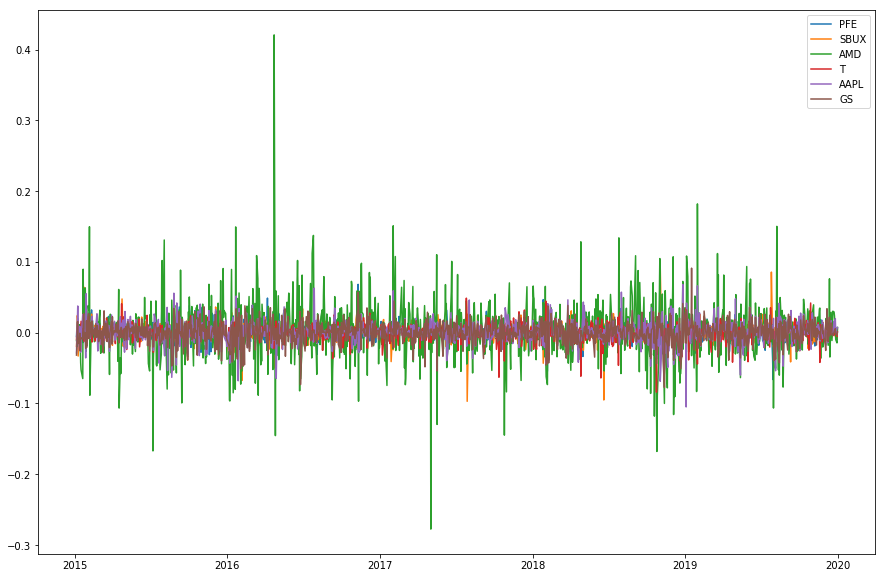

In [402]:
#plot daily returns
plt.figure(figsize = (15, 10))
for i in range(np.array(log_ret).shape[1]):
    plt.plot(log_ret.iloc[:,i],label=list(log_ret.columns)[i])
plt.legend();

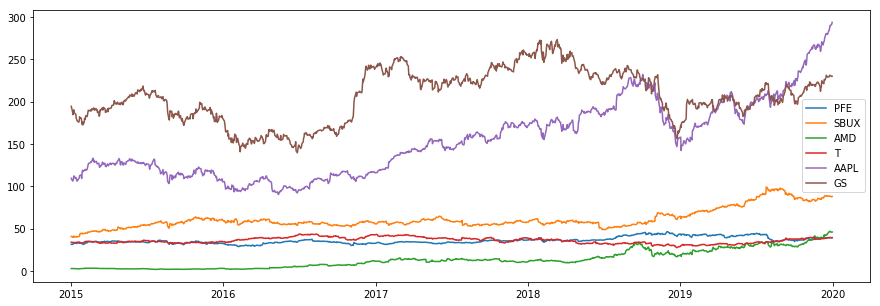

In [403]:
#plot time series data
plt.figure(figsize = (15,5))
for i in range(np.array(data).shape[1]):
    plt.plot(data.iloc[:,i],label=list(data.columns)[i])
plt.legend();

In [404]:
#calculate expected returns and variance
expectedreturns=[]
variance_=[]
for i in range(np.array(log_ret).shape[1]):
    expectedreturns.append(log_ret.iloc[:,i].mean())
    variance_.append(log_ret.iloc[:,i].var())

exp_var=pd.DataFrame([expectedreturns,variance_])
u=['exp','var']
exp_var=pd.concat([exp_var,pd.Series(u)],axis=1)
exp_var.set_index(exp_var.iloc[:,-1], inplace = True, append = True, drop = True)
exp_var.columns=list(log_ret.columns)+['to_del']
exp_var=exp_var.drop(columns=['to_del'])
exp_var

,,PFE,SBUX,AMD,T,AAPL,GS
,0,,,,,,
0,exp,0.000193,0.000612,0.002254,0.000118,0.000785,0.000137
1,var,0.000131,0.000170,0.001552,0.000136,0.000246,0.000226


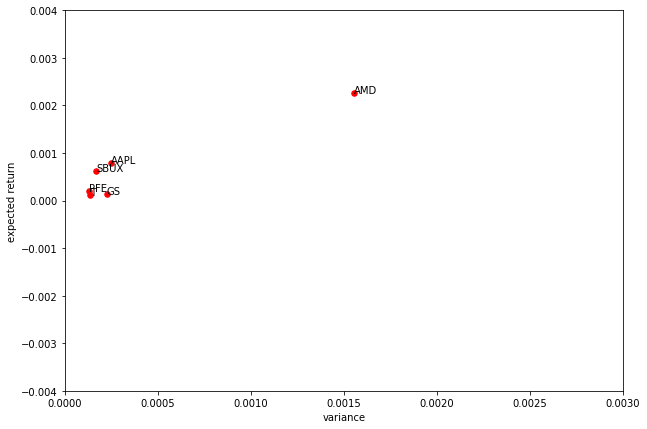

In [405]:
#plot expected returns and variance
plt.figure(figsize=(10,7))
plt.scatter(exp_var.iloc[1,:],exp_var.iloc[0,:],30,c='red')
plt.ylabel('expected return')
plt.xlabel('variance')
plt.xlim(left=0,right=0.003)
plt.ylim(bottom=-0.004,top=0.004)
for i, txt in enumerate(exp_var.columns):
    plt.annotate(txt, (exp_var.iloc[1,i],exp_var.iloc[0,i]))
plt.show()

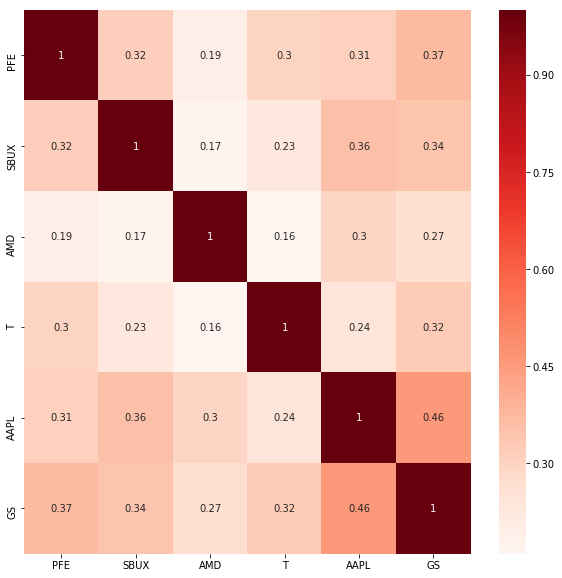

In [406]:
#correlation matrix
plt.figure(figsize=(10,10))
cor = log_ret.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [408]:
#generate potfolios with arbitrary weights
all_weights = np.zeros((num_ports, n))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(n))
    weights = weights/np.sum(weights)
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
min_variance_port=vol_arr.min()

In [409]:
#get return at minimum variance portfolio
min_var_inx=vol_arr.argmin()
min_var_port_ret=ret_arr[min_var_inx]

In [410]:
#CML equation: expected return =0.0179 + 0.3071865098913234*portfolio st deviation
x_cml = np.linspace(0, max(vol_arr))
slope = (max_sr_ret - rf) / (max_sr_vol)
y_cml = list(map(lambda x: rf + slope * x, x_cml))
print('CML equation: expected return = {} + {}*portfolio st deviation'.format(rf,slope))

CML equation: expected return = 0.0179 + 1.0492638279289594*portfolio st deviation


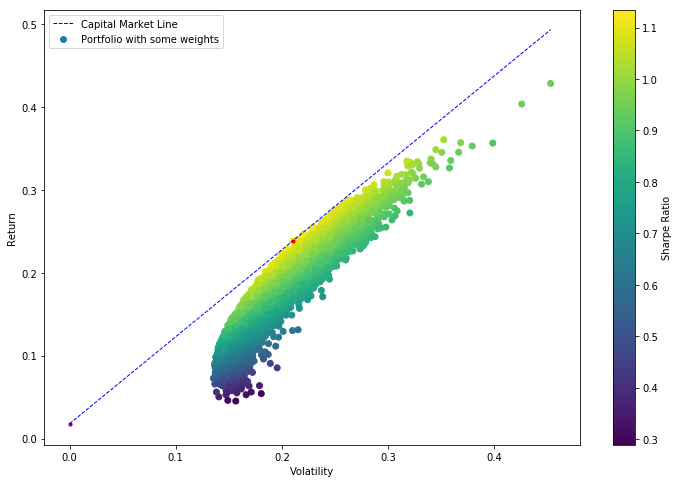

In [411]:
#distribution of portfolio returns
x=[0 ,max_sr_vol]
y=[1.79/100, max_sr_ret  ]

plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label = 'Portfolio with some weights')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=10) # red dot
plt.scatter(0, 1.79/100,c='purple', s=10) # red dot
plt.plot(x_cml, y_cml, linestyle='--', color='b', linewidth=1, label = 'Capital Market Line')
plt.legend()
plt.plot()
plt.show()

In [412]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1
def minimize_volatility(weights):
    return get_ret_vol_sr(weights)[1]

In [413]:
#optimize Sharpe ratio
frontier_y = np.linspace(min_var_port_ret, 0.5, 200)
cons = ({'type':'eq', 'fun': check_sum })
bounds = ((0,1),)*n
init_guess = list(map(lambda x: 1/n, range(n)))
opt_results = minimize(neg_sharpe, init_guess, method = 'SLSQP', bounds = bounds, constraints=cons)
print(opt_results)

     fun: -1.2418756776170974
     jac: array([-1.25110149e-04, -9.74386930e-05, -4.60222363e-04, -6.06477261e-06,
        2.75522470e-04, -6.38812780e-05])
 message: 'Optimization terminated successfully.'
    nfev: 98
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([-0.0778687 ,  0.75931361,  0.32844137, -0.10018122,  0.64979874,
       -0.55950381])


In [414]:
frontier_x = []
for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])


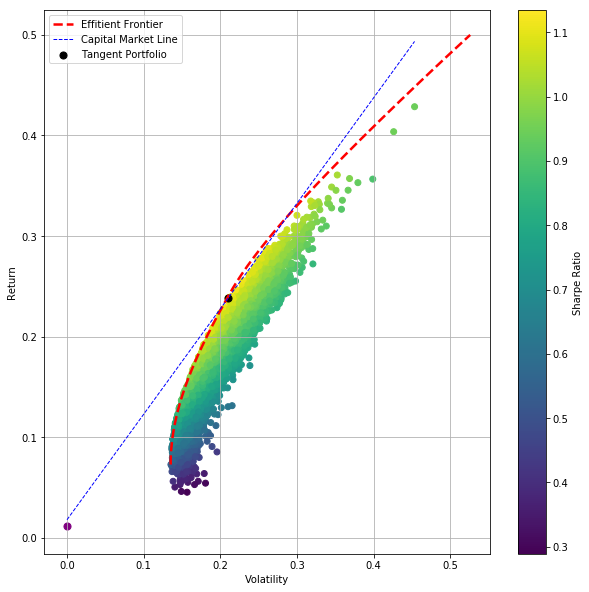

In [415]:
#plot efficient frontier and CML
plt.figure(figsize=(10,10))
plt.grid(linestyle = '-')
#plt.ylim([0,0.135])
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=2.5, label = 'Effitient Frontier')
#plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis', label = 'Portfolio with some weights')
plt.scatter(max_sr_vol, max_sr_ret,c='black', s=50, label = 'Tangent Portfolio') # red dot
plt.scatter(0, 1.19/100,c='purple', s=50) # red dot
plt.plot(x_cml, y_cml, linestyle='--', color='b', linewidth=1, label = 'Capital Market Line')
plt.legend()
plt.show()

In [394]:
#returns of stocks and market
total_return=pd.concat([log_ret,pd.Series(market_ret)],axis=1).iloc[1:,:]
total_return.head(3)

,PFE,SBUX,AMD,T,AAPL,GS,S&P 500
Date,,,,,,,
2015-01-05,-0.005441,-0.019341,-0.011215,-0.009493,-0.028576,-0.031720,-0.018447
2015-01-06,0.008309,-0.008044,-0.011342,0.001489,0.000094,-0.020437,-0.008933
2015-01-07,0.013593,0.024188,-0.019194,-0.012880,0.013925,0.014793,0.011563


In [395]:
covarian=list()
beta=list()
MRP=list()
for i in list(data.columns):
    covarian.append(total_return.cov().loc['S&P 500',i]) #covariance with market portfolio
marketvar=total_return['S&P 500'].var() #variance of market portfoilio
for j in covarian:
    beta.append(j/marketvar)
for u in list(total_return.columns):
    MRP.append(total_return[u].mean()-rf)

In [396]:
nul=['beta','MRP']
d=pd.DataFrame(np.transpose(np.array(beta)))
d=pd.concat([d,pd.Series(MRP)],axis=1)
d=pd.DataFrame(np.transpose(np.array(d)))
d=pd.concat([pd.Series(nul),d],axis=1)
d.columns=['_']+list(total_return.columns)
d=d.set_index(d['_'])
d=d.drop(columns=['_'])
d.loc['beta','S&P 500']=1
d

,PFE,SBUX,AMD,T,AAPL,GS,S&P 500
_,,,,,,,
beta,0.795220,0.847037,1.858847,0.635886,1.241431,1.290528,1.000000
MRP,-0.017707,-0.017288,-0.015646,-0.017782,-0.017115,-0.017763,-0.017535


In [397]:
#CAMP returns
camp=list()
for i in list(d.columns)[:-1]:
    camp.append(rf+d.loc['beta',i]*d.loc['MRP',i])
camp=pd.DataFrame(camp)
camp=pd.DataFrame(np.transpose(np.array(camp)))
camp.columns= list(d.columns)[:-1]
camp

,PFE,SBUX,AMD,T,AAPL,GS
0,0.003819,0.003256,-0.011183,0.006593,-0.003347,-0.005023


In [398]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import scipy.stats

total_return=total_return.dropna()
for k in list(total_return.columns[:-1]):
    y=np.array(total_return[k]).reshape(len(total_return[k]),)-rf
    x=np.array(total_return['S&P 500']).reshape(len(total_return['S&P 500']),1)-rf
    regr = LinearRegression()  
    regr.fit(x,y)
    prediction=regr.predict(x)
    R2=r2_score(y, prediction)
    F=R2/((1-R2)/(x.shape[0]-2))
    critical=scipy.stats.f.ppf(q=0.95, dfn=1, dfd=x.shape[0]-2)
    print('Regression for {} : intercept = {}, slope = {}, F-statistics = {} VS critical F-value = {}'.format(k,regr.intercept_,regr.coef_[0],F,critical))

Regression for PFE : intercept = -0.0037632881880339895, slope = 0.795220439852221, F-statistics = 669.8533258395204 VS critical F-value = 3.8488850232310883
Regression for SBUX : intercept = -0.0024330148933657276, slope = 0.8470369430375108, F-statistics = 547.3766614012677 VS critical F-value = 3.8488850232310883
Regression for AMD : intercept = 0.016925502678820512, slope = 1.8588465803795307, F-statistics = 238.67715437007305 VS critical F-value = 3.8488850232310883
Regression for T : intercept = -0.006632261452188254, slope = 0.6358858308247797, F-statistics = 342.33933631390084 VS critical F-value = 3.8488850232310883
Regression for AAPL : intercept = 0.004656346551163176, slope = 1.2414312840411785, F-statistics = 1025.7090160464354 VS critical F-value = 3.8488850232310883
Regression for GS : intercept = 0.004866209065215739, slope = 1.2905277420446681, F-statistics = 1419.0419166896643 VS critical F-value = 3.8488850232310883
